In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

**Reading of the data and creating a database called data.**


In [2]:
data = pd.read_csv('student_performance_prediction.csv')

**Data Cleaning**


In [3]:
data.info() # provides a brief description of all the columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [5]:
data.head() # returns the first 5 rows of the dataset

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [6]:
data.describe() # provides a statistical summary of the NUMERICAL Variables in the dataset which is part of EDA

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [7]:
data.isnull().sum() # returns the number of missing values in each column

,0
Student ID,0
Study Hours per Week,1995
Attendance Rate,1992
Previous Grades,1994
Participation in Extracurricular Activities,2000
Parent Education Level,2000
Passed,2000


**There are alot of missing values which means that we have a lot of standarzing to do.Student ID: Unique identifier for each student .
Study Hours per Week: Contains some incorrect values (e.g., negative hours).
Attendance Rate: Contains values exceeding 100% (e.g., 150%).
Previous Grades: Average grade in previous courses (0 to 100 scale). Contains incorrect values (e.g., grades over 100).
Participation in Extracurricular Activities: Indicates participation (Yes/No).
Parent Education Level: Highest level of education attained by the student's parents
Passed: Target variable indicating if the student passed the course (Yes/No).
**

In [13]:
# dealing with the null/ missing  values by filling in the misssing values with the mean  of the column for numerical columns(study hours, attendance rate,previous grades)
data['Study Hours per Week'].fillna(data['Study Hours per Week'].mean(), inplace=True)
data['Attendance Rate'].fillna(data['Attendance Rate'].mean(), inplace=True)
data['Attendance Rate'] = data['Attendance Rate'].round(2)
data['Previous Grades'].fillna(data['Previous Grades'].mean(), inplace=True)

In [18]:
# dealing with the null/ missing  values by filling in the misssing values with the mode(frequently occurring response) of the column
data['Parent Education Level'].fillna(data['Parent Education Level'].mode()[0], inplace=True)
data['Participation in Extracurricular Activities'].fillna(data['Participation in Extracurricular Activities'].mode()[0], inplace=True)
data['Passed'].fillna(0, inplace=True)

In [16]:
data['Passed'].mode()

,Passed
0,Yes


In [19]:
data.isnull().sum() # to confirm whether we still have null values

,0
Study Hours per Week,0
Attendance Rate,0
Previous Grades,0
Participation in Extracurricular Activities,0
Parent Education Level,0
Passed,0


In [8]:
data.nunique() # returns the number of unique values in each column

,0
Student ID,40000
Study Hours per Week,355
Attendance Rate,1235
Previous Grades,956
Participation in Extracurricular Activities,2
Parent Education Level,5
Passed,2


In [9]:
print("Duplicated Rows:",data.duplicated().sum())

Duplicated Rows: 0


In [10]:
print("The shape of data:",data.shape) # shows 40000 rows and 7 columns

The shape of data: (40000, 7)


**Data Preprocessing which involves dealing with unrealistic data and standardizing it**

In [27]:
# Study Hours per Week: Contains some incorrect values (e.g., negative hours)
negative_hours = data[data['Study Hours per Week'] < 0]
# we have to replace this with the absolute valueto remove the negative
data['Study Hours per Week'] = data['Study Hours per Week'].abs()
print(negative_hours)

Empty DataFrame
Columns: [Study Hours per Week, Attendance Rate, Previous Grades, Participation in Extracurricular Activities, Parent Education Level, Passed]
Index: []


In [30]:
# Attendance Rate: Contains values exceeding 100% (e.g., 150%).
attedence_rate = data[data['Attendance Rate'] > 100]
# we have to drop all the attendance rates that are greater than 100% since unrealistic
data = data[data['Attendance Rate'] <= 100]
print(attedence_rate)

Empty DataFrame
Columns: [Study Hours per Week, Attendance Rate, Previous Grades, Participation in Extracurricular Activities, Parent Education Level, Passed]
Index: []


In [32]:
# Previous Grades: Average grade in previous courses (0 to 100 scale). Contains incorrect values (e.g., grades over 100)
previous_grades = data[data['Previous Grades'] > 100]
# we have to drop all the attendance rates that are greater than 100% since unrealistic
data = data[data['Previous Grades'] <= 100]
print(previous_grades)

Empty DataFrame
Columns: [Study Hours per Week, Attendance Rate, Previous Grades, Participation in Extracurricular Activities, Parent Education Level, Passed]
Index: []


**EDA PART ONE: Descriptives**

In [33]:
print("Average Study Hours Per Week:",data['Study Hours per Week'].mean().round(2))
print("Average Attendance Rate:",data['Attendance Rate'].mean().round(2))
print("Average Previous Grades:",data['Previous Grades'].mean().round(2))
print("Max Study Hours Per Week:",data['Study Hours per Week'].max())
print("Min Study Hours Per Week:",data['Study Hours per Week'].min())
print("Max Attendance Rate:",data['Attendance Rate'].max())
print("Min Attendance Rate:",data['Attendance Rate'].min())
print("Max Previous Grades:",data['Previous Grades'].max())
print("Min Previous Grades:",data['Previous Grades'].min())


Average Study Hours Per Week: 10.04
Average Attendance Rate: 71.21
Average Previous Grades: 64.73
Max Study Hours Per Week: 32.4
Min Study Hours Per Week: 0.0
Max Attendance Rate: 100.0
Min Attendance Rate: -14.3
Max Previous Grades: 100.0
Min Previous Grades: 8.3


In [34]:
# or use .describe()
data.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,35427.000000,35427.000000,35427.000000
mean,10.040825,71.208781,64.727047
std,4.720415,16.377817,14.148394
min,0.000000,-14.300000,8.300000
25%,6.800000,60.700000,55.500000
50%,9.962744,73.800000,65.440107
75%,13.200000,83.200000,74.200000
max,32.400000,100.000000,100.000000


**EDA PART TWO: Correlation**

                      Study Hours per Week  Attendance Rate  Previous Grades
Study Hours per Week               1.00000              NaN          0.00244
Attendance Rate                        NaN              NaN              NaN
Previous Grades                    0.00244              NaN          1.00000


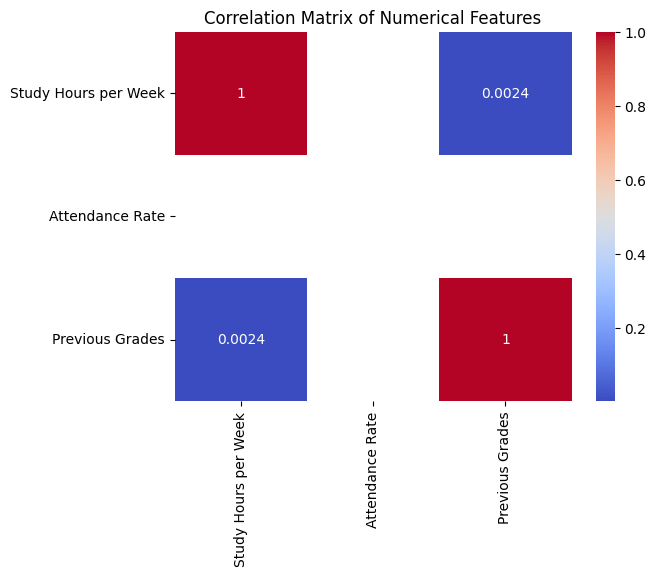

In [50]:
# Select the numerical columns
numerical_cols = ['Study Hours per Week', 'Attendance Rate', 'Previous Grades']
numerical_data = data[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# visualizing the correlation matrix using a heatmap:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**EDA PART THREE: Univariate analysis**

Study hours/attendace rate/previous grades distribution

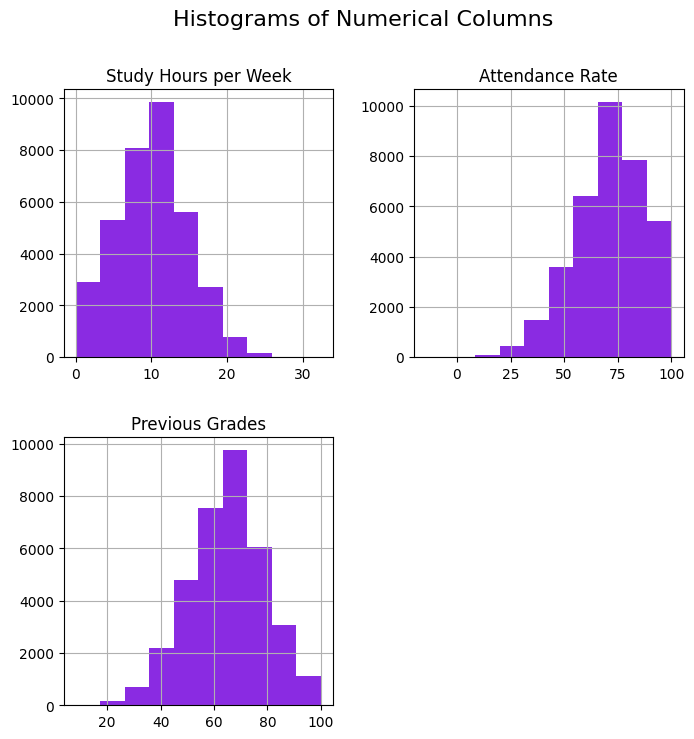

In [35]:
numerical_df = data.select_dtypes(include=['float64', 'int64'])

numerical_df.hist(color='#8A2BE2', figsize=(8, 8), bins=10)
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()

Previous grades are approximately normally distributed while study hours and attendance rates are negatively(left)& positively(right) skewed respectively


** Distribution of Passed**

In [38]:
data['Passed'].value_counts()
target_dis = data['Passed'].value_counts().reset_index()
target_dis.columns = ['Passed', 'Count']

custom_colors = ['#F0A500', '#F26D3F']

fig = px.bar(target_dis, x='Passed', y='Count', title='Medals',
             color='Passed', color_discrete_sequence=custom_colors)

fig.update_layout(
    xaxis_title='Passed',
    yaxis_title='Count',
    width = 500,
    height = 500
)

fig.show()

**Distribution of Extra curricular Activities**

In [40]:
take = data['Participation in Extracurricular Activities'].value_counts().reset_index()
take.columns = ['Participation in Extracurricular Activities', 'Count']

custom_colors = ['#F0A500', '#F26D3F']

fig = px.bar(take, x='Participation in Extracurricular Activities', y='Count',
             title='Extracurricular Activities',
             color='Participation in Extracurricular Activities',
             color_discrete_sequence=custom_colors)

fig.update_layout(
    xaxis_title='Extracurricular Activities',
    yaxis_title='Count',
    width=800,
    height=500
)

fig.show()

Most students don't participate in extra curricular activities

**Distribution of Parent Education Levels**

In [41]:
edu_count = data['Parent Education Level'].value_counts().reset_index()
edu_count.columns = ['Parent Education Level', 'Count']

custom_colors = ['#F0A500', '#F26D3F', '#29A0B1', '#C25A7C', '#6A0572']

fig = px.bar(edu_count, x='Parent Education Level', y='Count',
             title='Parent Education Levels',
             color='Parent Education Level',
             color_discrete_sequence=custom_colors)

fig.update_layout(
    xaxis_title='Parent Education Level',
    yaxis_title='Count',
    width=800,
    height=500
)

fig.show()

Most parents have reached the bachelor's level of education